# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Alexandra Ledgerwood
Github Repo: https://github.com/ALedgerwood/Module-6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

# Question 1
### extract article html from website

In [2]:
import requests

response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

print(response.status_code)
print(response.headers['content-type'])
# Uncomment next line to print the full HTML text;  it's long so when done, recomment
# print(response.text)

200
text/html; charset=UTF-8


In [3]:
from bs4 import BeautifulSoup

# parser = 'html5lib'
parser = 'html.parser'

soup = BeautifulSoup(response.text, parser)
# Uncomment next lines to explore full page contents; it's long so when done, recomment
# print(soup)
# print(soup.prettify())

In [4]:
for header in soup.findAll('h1'):
    print('h1 header:', header)
    #print('h1 text:', header.text)

h1 header: <h1 class="site-title">
<a href="https://web.archive.org/web/20210327165005/https://hackaday.com/" rel="home">Hackaday</a>
</h1>
h1 header: <h1 class="entry-title" itemprop="name">How Laser Headlights Work</h1>
h1 header: <h1 class="screen-reader-text">Post navigation</h1>
h1 header: <h1 class="widget-title">Search</h1>
h1 header: <h1 class="widget-title">Never miss a hack</h1>
h1 header: <h1 class="widget-title">Subscribe</h1>
h1 header: <h1 class="widget-title">If you missed it</h1>
h1 header: <h1 class="widget-title">Our Columns</h1>
h1 header: <h1 class="widget-title">Search</h1>
h1 header: <h1 class="widget-title">Never miss a hack</h1>
h1 header: <h1 class="widget-title">Subscribe</h1>
h1 header: <h1 class="widget-title">If you missed it</h1>
h1 header: <h1 class="widget-title">Categories</h1>
h1 header: <h1 class="widget-title">Our Columns</h1>
h1 header: <h1 class="widget-title">Recent comments</h1>
h1 header: <h1 class="widget-title">Now on Hackaday.io</h1>
h1 heade

In [59]:
import requests
import pickle

def extract_article_html(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to fetch the webpage")
        return None

if __name__ == "__main__":
    url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
    article_html = extract_article_html(url)

    if article_html:
        output_filename = "article_html.pkl"
        with open(output_filename, "wb") as f:
            pickle.dump(article_html, f)
        print(f"Article HTML saved to {output_filename}")

Article HTML saved to article_html.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

# Question 2
### Get the article text

In [73]:
import pickle
from bs4 import BeautifulSoup
parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)

def extract_text_from_html(html_content):
    return soup.get_text()

if __name__ == "__main__":
    input_filename = "article_html.pkl"
    with open(input_filename, "rb") as f:
        article_html = pickle.load(f)

    article_element = soup.find('article')
    print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

# Question 3
### Determine five most frequent tokens

In [74]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)

from collections import Counter

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(f'The 5 most common tokens are: {word_freq.most_common(5)}')

top_five_tokens = set()
for token, freq in word_freq.most_common(5):
    top_five_tokens.add(token)

print(top_five_tokens)

The 5 most common tokens are: [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]
{'led', 'technology', 'laser', 'headlight', 'headlights'}


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

# Question Four
### Five most common lemmas

In [75]:
# dealing with words that have the same base word like headlight and headlights in this case
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

print(f'The 5 most common lemmas are: {lemma_freq.most_common(5)}')

top_five_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    top_five_lemmas.add(lemma)

print(top_five_lemmas)

The 5 most common lemmas are: [('laser', 40), ('headlight', 28), ('beam', 12), ('technology', 10), ('light', 10)]
{'technology', 'laser', 'beam', 'headlight', 'light'}


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

# Question 5

In [76]:
## score_sentence_by_token 
import spacy
import string

# find the total words in a sentence 
def count_words_using_split(sentence):
    words = sentence.split(' ')
    words = [word for word in words if word.strip(string.punctuation)]
    return len(words)

def score_sentence_by_token(sentence, interesting_tokens):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(sentence)
    interesting_token_count = sum([1 for token in doc if token.text.lower() in interesting_tokens])

    score = interesting_token_count / count_words_using_split(sentence) if count_words_using_split(sentence) > 0 else 0.0

    return score

sentence1 = 'When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.'

score_sentence_by_token(sentence1, top_five_tokens)

0.1

In [77]:
## score sentence by lemma

import spacy

def score_sentence_by_lemma(sentence, interesting_lemmas):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc]
    interesting_lemma_count = sum([1 for lemma in lemmas if lemma in interesting_lemmas])

    score = interesting_lemma_count / count_words_using_split(sentence) if count_words_using_split(sentence) > 0 else 0.0

    return score

sentence1 = 'When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.'

score_sentence_by_lemma(sentence1, top_five_lemmas)

0.1

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

# Question Six
### histograms

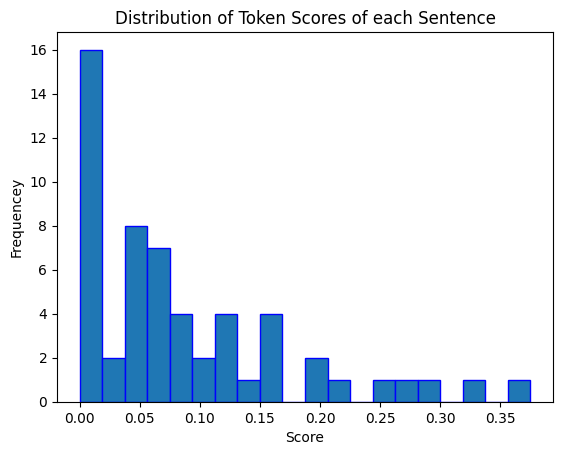

In [78]:
import pickle
import spacy
import matplotlib.pyplot as plt

def extract_sentences(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    return sentences

if __name__ == "__main__":
    input_filename = "article_html.pkl"
    with open(input_filename, "rb") as f:
        article_html = pickle.load(f)

    article_element = soup.find('article')

    article_text = article_element.get_text()
    sentences = extract_sentences(article_text)
    scores_by_tokens = []
    interesting_tokens = top_five_tokens

    for sentence in sentences:
        score = score_sentence_by_token(sentence, interesting_tokens)
        scores_by_tokens.append(score)

    plt.hist(scores_by_tokens, bins=20, edgecolor='blue')
    plt.xlabel("Score")
    plt.ylabel("Frequencey")
    plt.title("Distribution of Token Scores of each Sentence")
    plt.show()
    
# the most common is .00 to .06

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

# Question 7
### Scores of Lemmas

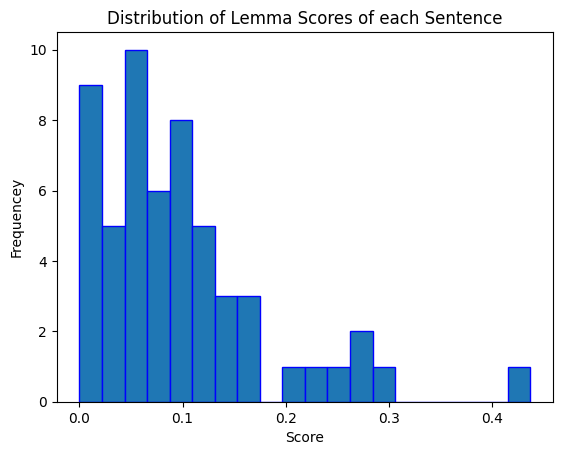

In [79]:
import pickle
import spacy
import matplotlib.pyplot as plt

def extract_sentences(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    return sentences

if __name__ == "__main__":
    input_filename = "article_html.pkl"
    with open(input_filename, "rb") as f:
        article_html = pickle.load(f)

    article_element = soup.find('article')

    article_text = article_element.get_text()
    sentences = extract_sentences(article_text)
    scores_by_lemmas = []
    interesting_lemmas = top_five_lemmas

    for sentence in sentences:
        score = score_sentence_by_lemma(sentence, interesting_lemmas)
        scores_by_lemmas.append(score)

    plt.hist(scores_by_lemmas, bins=20, edgecolor='blue')
    plt.xlabel("Score")
    plt.ylabel("Frequencey")
    plt.title("Distribution of Lemma Scores of each Sentence")
    plt.show()

## most common scores are between 0.0 and 0.1

# Question 8
### Changing which words we see as important

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If all the tokens and lemmas were lowercase, the token LED becomes led, which is a verb. So it would get dropped when we only considered nouns. The lemma list would remain unchanged.

The code we would need to change to consider only nouns is
token.text for token in doc is token.pos_ == 'NOUN'
